In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os
import io
import re
from scipy.io.wavfile import read
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.cm as cmx
from datetime import datetime, timezone
import datetime
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


In [61]:
def load_waveform(filepath):
    with open(filepath) as dataFile:
        data = dataFile.read()
        # Check for missing commas and insert them
        pattern = r'(\{[^{}]*"[^"]*"[^{}]*\})(?=[^{}]*\{)'
        data = re.sub(pattern, r'\1,', data)

        obj = data[data.find('{') : data.rfind('}')+1]
        
        jsonObj = json.loads(obj)
        
        if jsonObj['data']:
            waveform_data = pd.DataFrame(jsonObj['data'])    
            return waveform_data
    return []


In [62]:
dirpaths = ["C://Users//Dave//Desktop//MACHINEL2//positive","C://Users//Dave//Desktop//MACHINEL2//negative",
            "C://Users//Dave//Desktop//MACHINEL2//unclassified"]


In [63]:
dataframes = []

for dirpath in dirpaths:
    for filename in os.listdir(dirpath):
        if filename.endswith(".js"):
            filepath = os.path.join(dirpath, filename)
            waveform = load_waveform(filepath)
           # if not waveform.empty:
            dataframes.append(waveform)

'''
 #code below to check for file errors, typos
for filepath in filepaths:
    try:
        waveform = load_waveform(filepath)
    except Exception as e:
        print(f"Error in file {filepath}: {e}") #neg file, 1361888
'''


'\n #code below to check for file errors, typos\nfor filepath in filepaths:\n    try:\n        waveform = load_waveform(filepath)\n    except Exception as e:\n        print(f"Error in file {filepath}: {e}") #neg file, 1361888\n'

In [64]:

pdf = dataframes[0]
ndf = dataframes[1]
udf = dataframes[2]


pdf.columns = ["peak_amplitude","integral","phase_angle","cycle_number","rise_time","pulse_width"]
ndf.columns = ["peak_amplitude","integral","phase_angle","cycle_number","rise_time","pulse_width"]
udf.columns = ["peak_amplitude","integral","phase_angle","cycle_number","rise_time","pulse_width"]


In [65]:
np.where(pd.isnull(pdf))
np.where(pd.isnull(ndf))
np.where(pd.isnull(udf))


(array([], dtype=int64), array([], dtype=int64))

C:\Users\Dave\AppData\Local\Temp\ipykernel_24064\2505435697.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pdf['phase_angle'],pdf['peak_amplitude'], s=8, cmap=cmx.plasma)


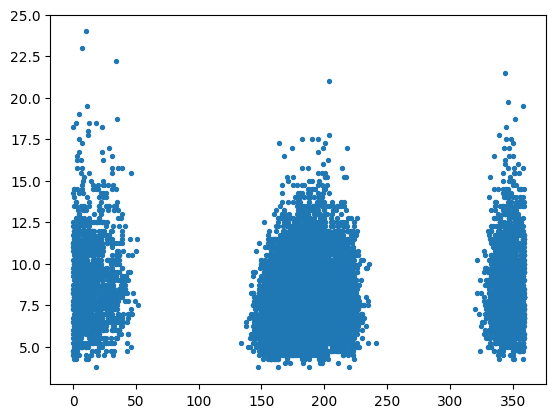

In [66]:
plt.scatter(pdf['phase_angle'],pdf['peak_amplitude'], s=8, cmap=cmx.plasma)


plt.show()

C:\Users\Dave\AppData\Local\Temp\ipykernel_24064\4175698270.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pdf['cycle_number'],pdf['integral'], s=8, cmap=cmx.plasma)


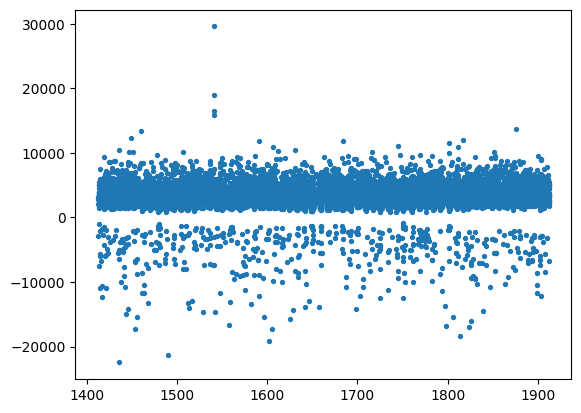

In [67]:
plt.scatter(pdf['cycle_number'],pdf['integral'], s=8, cmap=cmx.plasma)


plt.show()

C:\Users\Dave\AppData\Local\Temp\ipykernel_24064\3257962712.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pdf['pulse_width'],pdf['rise_time'], s=8, cmap=cmx.plasma)


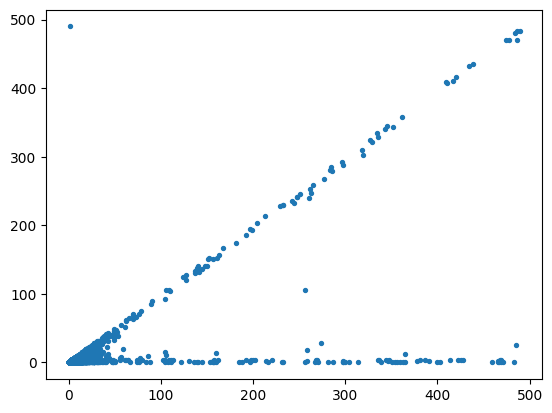

In [68]:
plt.scatter(pdf['pulse_width'],pdf['rise_time'], s=8, cmap=cmx.plasma)


plt.show()

In [69]:
selected_features = ["phase_angle", "peak_amplitude"]
X = pdf[selected_features]

# Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

DBSCAN()

In [71]:
pdf["cluster"] = dbscan.labels_

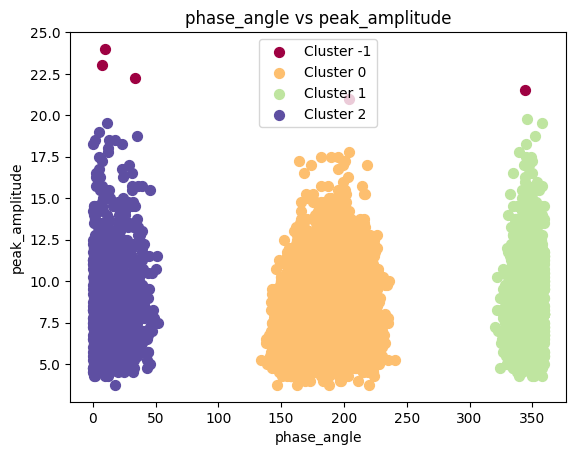

In [72]:
# Function to create a scatter plot with different colors for each cluster
def plot_dbscan_clusters(data, x_feature, y_feature, cluster_column):
    unique_clusters = np.unique(data[cluster_column])
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_clusters)))

    for cluster, color in zip(unique_clusters, colors):
        cluster_data = data[data[cluster_column] == cluster]
        plt.scatter(cluster_data[x_feature], cluster_data[y_feature], c=[color], s=50, label=f"Cluster {cluster}")

    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"{x_feature} vs {y_feature}")
    plt.legend()
    plt.show()

# Create a scatter plot with different colors for each DBSCAN cluster and noise points
plot_dbscan_clusters(pdf, "phase_angle", "peak_amplitude", "cluster")

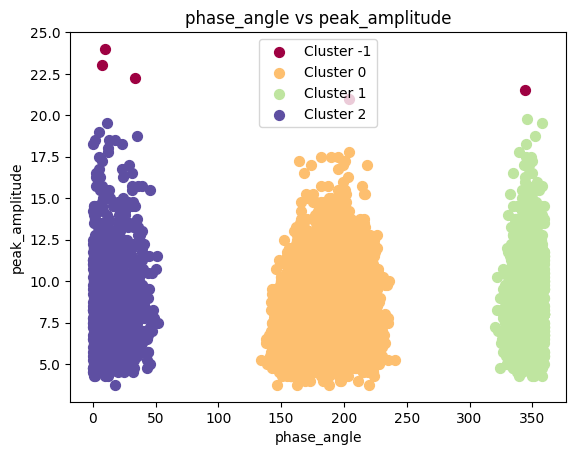

In [73]:
plot_dbscan_clusters(pdf, "phase_angle", "peak_amplitude", "cluster")

In [74]:
selected_features = ["phase_angle", "peak_amplitude"]
X = ndf[selected_features]

# Scale the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

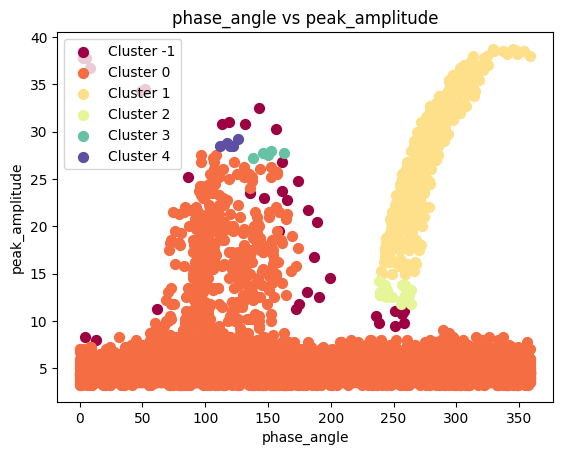

In [86]:
dbscan = DBSCAN(eps=0.17, min_samples=5)
dbscan.fit(X_scaled)
ndf["cluster"] = dbscan.labels_
plot_dbscan_clusters(ndf, "phase_angle", "peak_amplitude", "cluster")